# Missingno

Missingno es una librería orientada al análisis visual de datos faltantes. Muy útil en las etapas iniciales de los análisis.

Para esta demo, utilizaremos los datos de Gapminder que ofrece Plotly

In [2]:
# Importaciones
!pip install missingno
import missingno as msno


# Importar otros módulos
import pandas as pd
import numpy as np
import plotly.express as px

You should consider upgrading via the 'C:\Users\jgcha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Cargar datos desde Plotly
# Obtener datos
data = px.data.gapminder()

# Crear columna para PIB (GDP)
data['gdp'] = data['pop'] * data['gdpPercap']

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


In [6]:
# Pasar los datos a formato ancho
data_ancho = pd.pivot(data, index = 'country', columns = 'year', values = 'gdpPercap')
data_ancho.head(10)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,5288.040382,6223.367465
Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,2773.287312,4797.231267
Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Australia,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340
Bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792


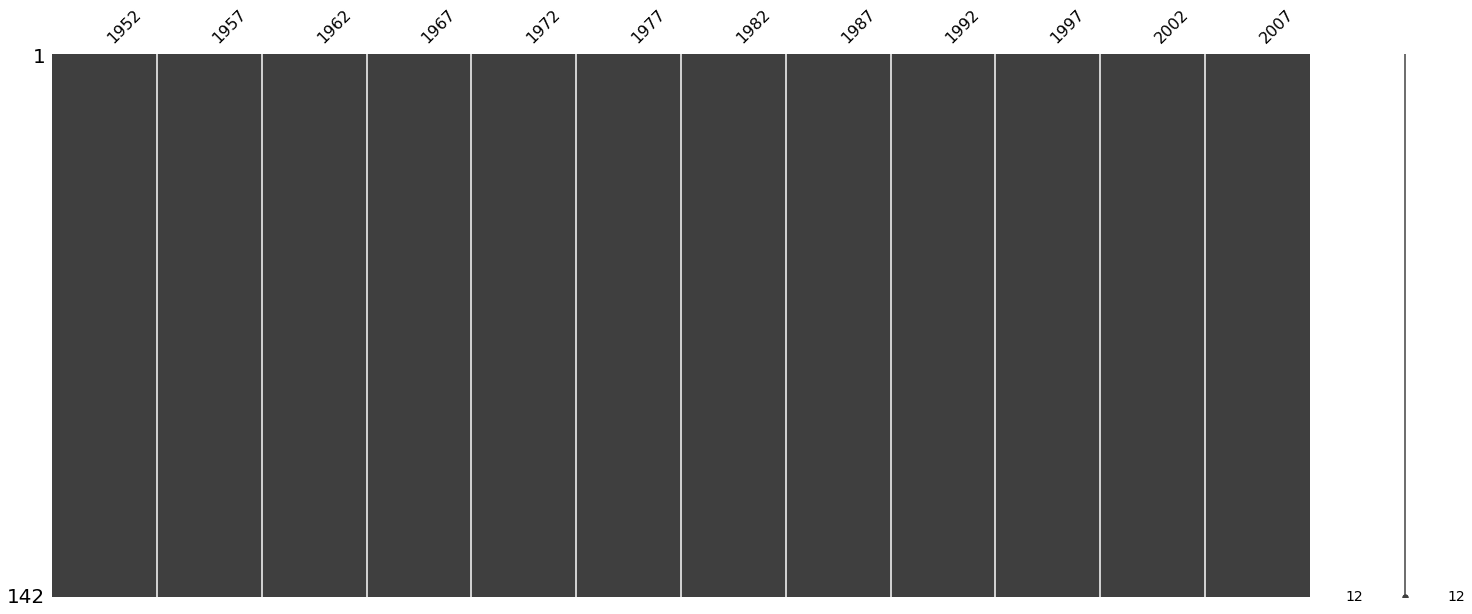

In [9]:
# Detectar nulos en data_ancho
msno.matrix(data_ancho);

In [11]:
# Eliminar algunos datos en data_ancho
data_ancho.iloc[23:41, 3:7] = np.nan
data_ancho.iloc[102:109, 6:9] = np.nan

En Missingno, las celdas con datos no nulos se marcan en negro. Si hay datos faltantes, aparecen en blanco,
La línea de la derecha indica en número de celdas con datos válidos en cada fila. Los números indican las filas con la máxima y mínima cantidad de datos válidos.

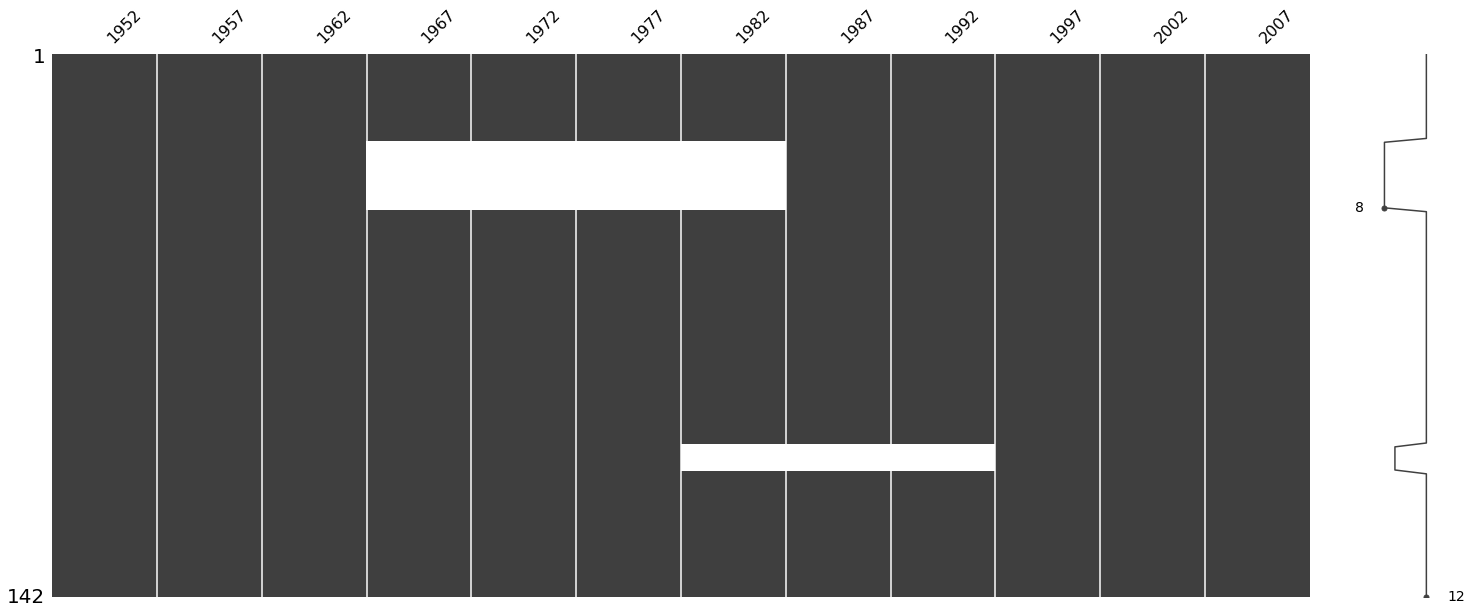

In [12]:
# Detectar nulos en data_ancho
msno.matrix(data_ancho);

También puede verse fácilmente a través del gráfico de barras.

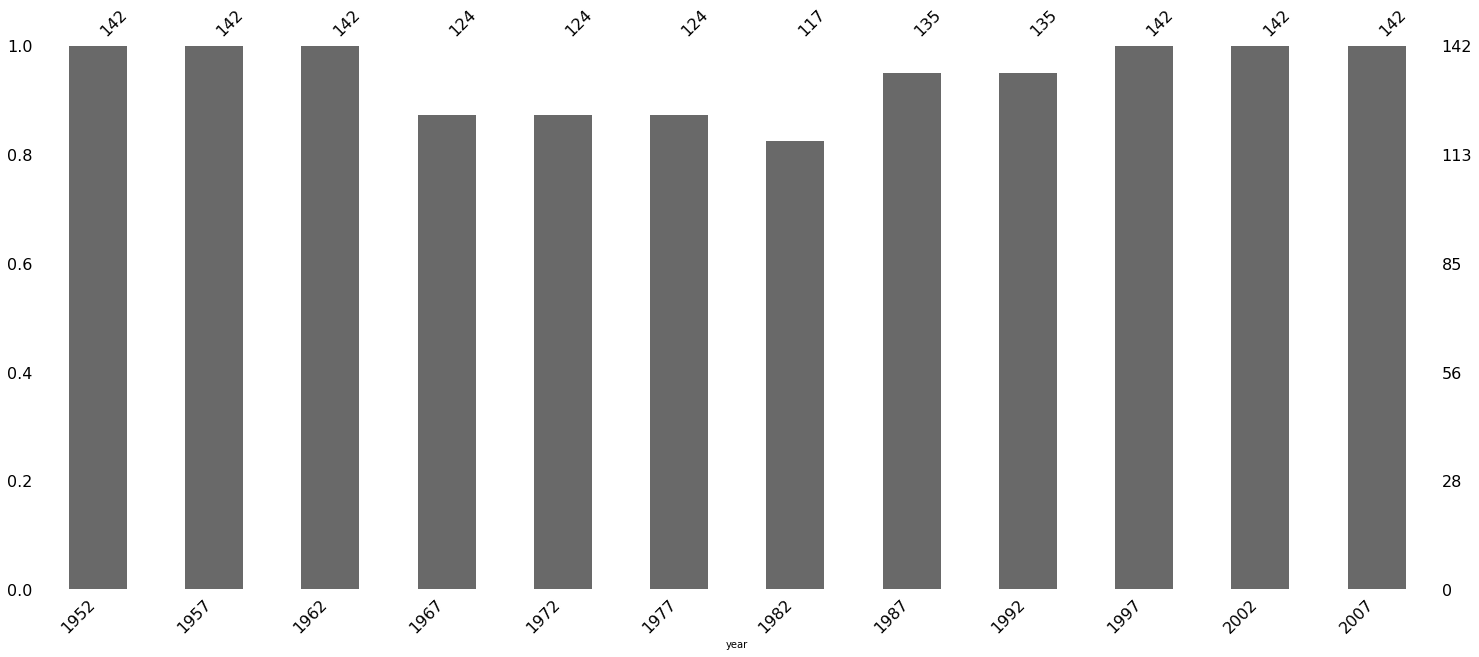

In [19]:
msno.bar(data_ancho);

En ocasiones y si el estudio lo permite, ordenar las filas en función del número de nulos ayuda a detectar
patrones. Esto puede lograrse fácilmente con la siguiente función:

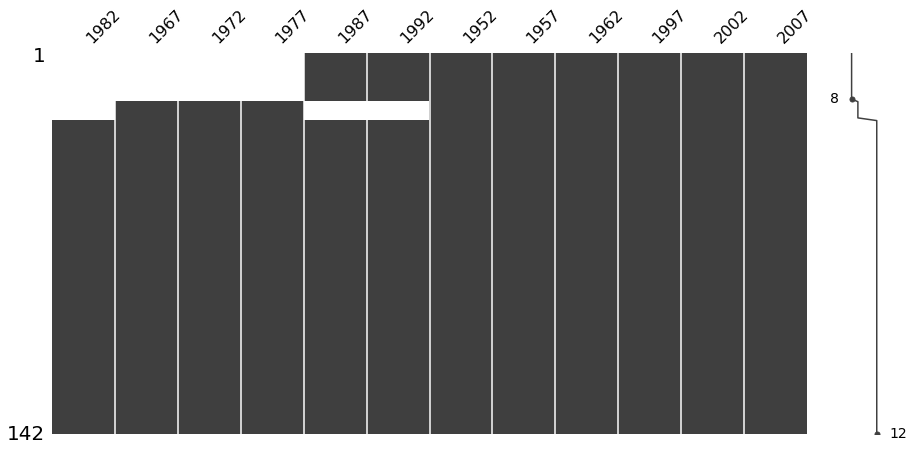

In [23]:
def msno_matriz_ordenada(datos):

  # Ordenar los datos según número de nulos
  indices_filas_nulos = datos.isnull().sum(axis = 1).sort_values(ascending = False).index
  indices_columnas_nulos = datos.isnull().sum(axis = 0).sort_values(ascending = False).index
  datos_ordenados_nans = datos.loc[indices_filas_nulos, indices_columnas_nulos]

  # Generar matriz final
  matriz = msno.matrix(datos_ordenados_nans, figsize = (15, 7))
  return matriz

msno_matriz_ordenada(data_ancho);

El dendograma describe las relaciones entre los datos faltantes. En este caso, vemos que une en un mismo grupo todas las columnas sin datos faltantes, y separa en tres los restantes: dos para los que solo carecen de un dato y otro extra para 1982, que contiene dos nulos. 

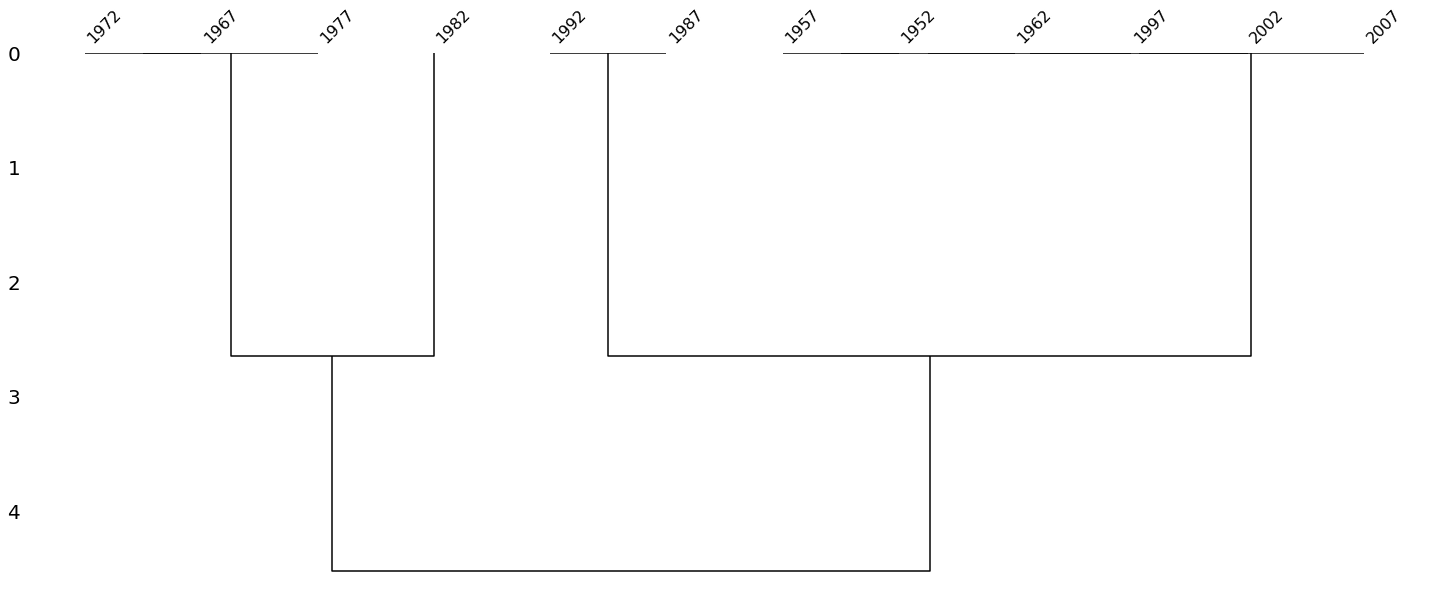

In [15]:
msno.dendrogram(data_ancho);

El mapa de calor (heatmap) muestra la correlación entre los **datos faltantes**, no entre el valor de las celdas en sí: 
* 1 indica que si un dato está presente en una columna, estará también en otra la otra columna.
* -1 indica que si un dato no está en una columna, sí estará en la otra columna, y viceversa.

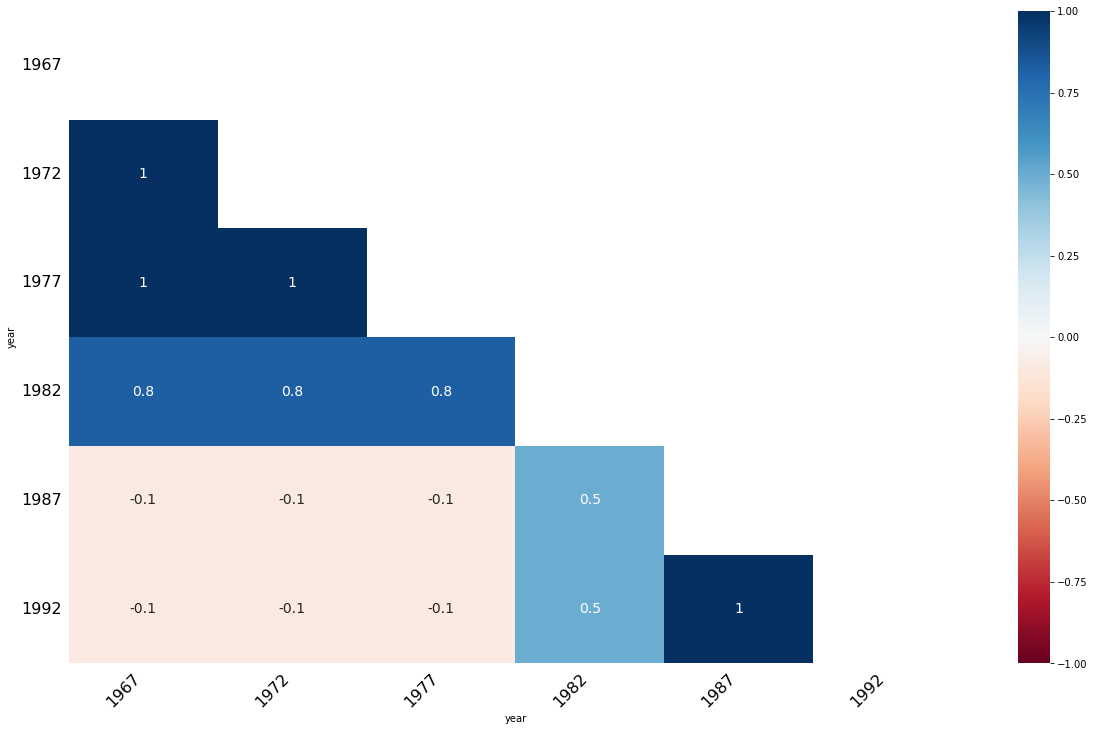

In [17]:
msno.heatmap(data_ancho);

# Enlaces de interés

* [Repositorio original y documentación de Missingno](https://github.com/ResidentMario/missingno)